In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch

try:
    import scheduler
except ImportError as e:
    if "_dh" in globals():
        notebook_folder = globals()["_dh"][0]
        parent_folder = os.path.dirname(notebook_folder)
        sys.path.append(parent_folder)
        import scheduler
    else:
        raise e


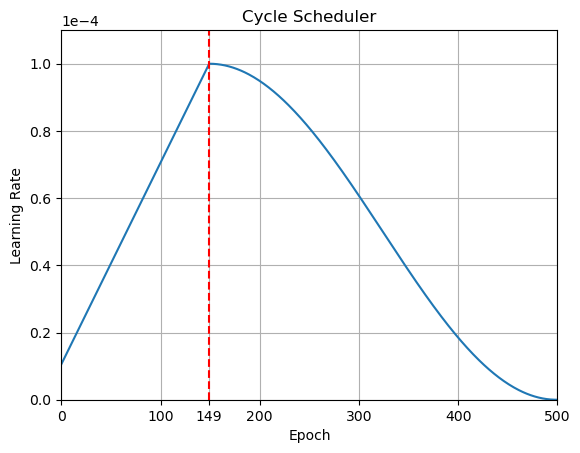

Max epoch: 149


In [2]:
lr_max = 1e-4
divider = 10
n_epoch = 500

lr_min = lr_max / divider

net = torch.nn.Linear(1, 1)
optim = torch.optim.AdamW(net.parameters())
sched = scheduler.CycleScheduler(optim, lr_max=lr_max, n_iter=n_epoch, divider=divider)

results = np.array([sched.step() for i in range(n_epoch)])
max_epoch = np.argmax(results[:, 0])

plt.plot(np.arange(0, n_epoch), results[:, 0])
plt.title("Cycle Scheduler")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")

# Use scientific notation for yaxis
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

# Mark the epoch with max lr
plt.axvline(x=max_epoch, color="r", linestyle="--")

# Insert singular xtick for max epoch
plt.xticks(np.append(plt.xticks()[0], max_epoch))

# Set xlims and ylims
plt.xlim(0, n_epoch)
plt.ylim(0, lr_max + 0.1 * lr_max)

plt.grid()
plt.show()

print(f"Max epoch: {max_epoch}")